# Баранов Арсений Юрьевич БФБО-05-23

~~~
Регрессия – это зависимость среднего значения какой-либо величины
от некоторой другой величины или от нескольких других величин. В
отличие от чисто функциональной зависимости 𝑦𝑦 = 𝑓𝑓(𝑥𝑥), когда каждому
значению независимой переменной 𝑥𝑥 соответствует одно определённое
значение зависимой переменной у, при регрессионной связи одному и тому
же значению независимой переменной (фактору) 𝑥𝑥 могут соответствовать в
зависимости от конкретного случая различные значения зависимой
переменной (отклика) у.
Изучение регрессии основано на том, что случайные величины Х и 𝑌𝑌
связаны между собой вероятностной зависимостью: при каждом
конкретном значении 𝑋𝑋 = 𝑥𝑥 величина 𝑌𝑌 является случайной величиной с
вполне определённым распределением вероятностей. Зависимость
зависимой переменной – отклика от одной независимой переменной –
фактора или нескольких факторов называется уравнением регрессии. По
количеству факторов выделяют парную (однофакторную) и
множественную (многофакторную) регрессию. Для парной будем
рассматривать следующие методы регрессии: линейную, показательную,
экспоненциальную, гиперболическую и параболическую.
Регрессионный анализ – это раздел математической статистики,
изучающий регрессионную зависимость между случайными величинами по
статистическим данным. Цель регрессионного анализа состоит в
определении общего вида уравнения регрессии, вычислении оценок
неизвестных параметров, входящих в уравнение регрессии проверке
статистических гипотез о регрессионной связи.
Таким образом, регрессионный анализ – набор статистических
методов исследования влияния одной или нескольких независимых
переменных 𝑋𝑋1, … , 𝑋𝑋𝑛𝑛 на зависимую переменную 𝑌𝑌. Независимые
переменные иначе называют регрессорами или предикторами, а зависимые
переменные – критериальными переменными.
~~~

## 1.1. Теоретический материал – Линейные регрессионные модели
~~~
Линейная регрессия (Linear regression) – модель зависимости переменной
x от одной или нескольких других переменных (факторов, регрессоров,
независимых переменных) с линейной функцией зависимости. Линейная
регрессия относится к задаче определения «линии наилучшего соответствия»
через набор точек данных и стала простым предшественником нелинейных
методов, которые используют для обучения нейронных сетей.
Цель линейной регрессии — поиск линии, которая наилучшим образом
соответствует этим точкам. Напомним, что общее уравнение для прямой есть
𝑓𝑓 (𝑥𝑥) = 𝑏𝑏 + 𝑚𝑚 ⋅ 𝑥𝑥 +, где 𝑚𝑚 – наклон линии, а 𝑏𝑏 – его сдвиг.
Функция потерь — метод наименьших квадратов
Функция потерь – это мера количества ошибок, которые наша линейная
регрессия делает на наборе данных. Хотя есть разные функции потерь, все они
вычисляют расстояние между предсказанным значением 𝑦𝑦(х) и его
фактическим значением.
Одна очень распространенная функция потерь называется средней
квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все
значения ошибок, считаем их квадраты длин и усредняем.
Задача экраполяции
Допустим у нас есть много экспериментальных точек. Необходимо через
них провести кривую, которая как можно ближе проходила к этим точкам. При
этом необходимо минимизировать среднюю квадратичную ошибку (MSE).
Для решения данной задачи в Python есть множество библиотек. Самыми
распостраненными выступают:
numpy - numpy.linalg.lstsq
scipy - scipy.linalg (содержит все функции из numpy.linalg плюс часть
новых функций, которых нет в numpy.linalg).
~~~

## 1.1.1 Пример
Задача:
Проведем прямую 𝑦𝑦 = 𝑚𝑚𝑚𝑚 + 𝑏𝑏 через экспериментальные точки.

In [4]:
import numpy as np
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

A = np.vstack([x, np.ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [5]:
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

0.9999999999999997 -0.9499999999999992


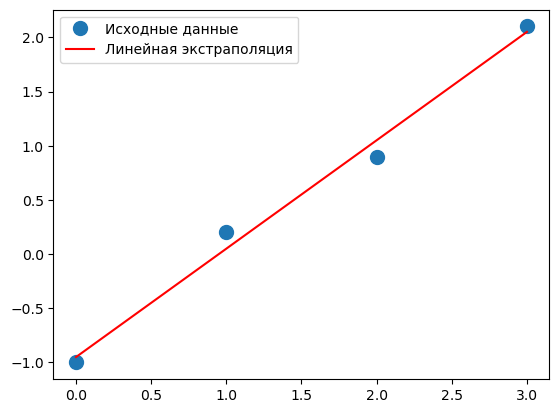

In [6]:
import matplotlib.pyplot as plt
plt.plot(x, y, "o", label = "Исходные данные", markersize = 10)
plt.plot(x, m * x + c, "r", label = "Линейная экстраполяция")
plt.legend()
plt.show()

## 1.1.2 Пример
Задача:
Пусть 𝑥𝑥, 𝑦𝑦 – вектора длиной 𝑛𝑛 > 3 (точек > 3). Задача заключается в
построении эстраполяционного полинома второго порядка (параболы). Таким
образом, необходимо найти такие коэффициенты поринома 𝑎𝑎, 𝑏𝑏, 𝑐𝑐 по методу
наименьших квадратов. Данные мтогут быть получены в результате
измерений. Покажем пример генерации данных случайным образом и
загрузки их из файла.

In [7]:
from numpy import *
from numpy.random import *

delta = 1.0
x = linspace(-5, 5, 11)
y = x ** 2 + delta * (rand(11) - 0.5)
x += delta * (rand(11) - 0.5)

x.tofile("x_data.txt", "\n")
y.tofile("y_data.txt", "\n")

In [8]:
x = fromfile("x_data.txt", float, sep = "\n")
y = fromfile("y_data.txt", float, sep = "\n")

print(x)
print(y)

[-5.0843922  -4.33026366 -2.53979668 -2.338684   -0.67225192  0.22440145
  0.74019408  2.18050584  2.77009633  3.87332375  4.96157185]
[24.98924447 16.29574068  8.89887676  3.67500119  0.81527351 -0.12091231
  1.04966233  4.43363773  9.14530019 16.32241601 24.59649392]


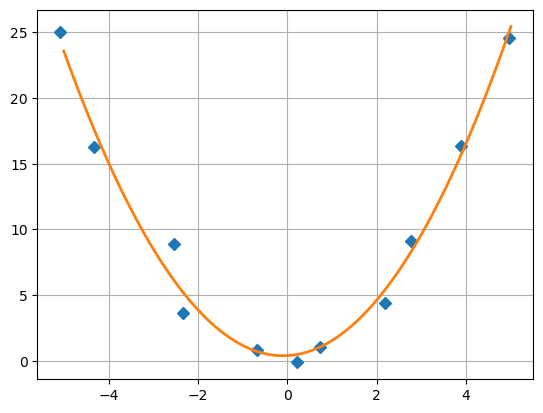

In [9]:
m = vstack((x ** 2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-5, 5, 101)
plt.plot(x, y, "D")
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], "-", lw = 2)
plt.grid()
plt.savefig("парабола.png")

## 1.1.3 Пример
Задача:
По данным предыдущего примера постройте эстраполяционного полинома
третьего порядка

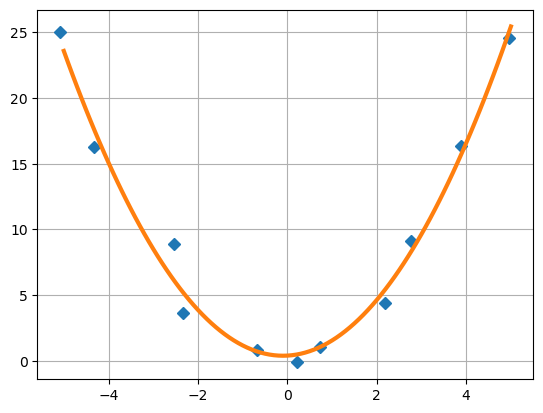

In [10]:
m = vstack((x ** 3, x ** 2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-5, 5, 101)
plt.plot(x, y, "D")
plt.plot(x_prec, s[0] * x_prec ** 3 + s[1] * x_prec ** 2 + s[2] * x_prec + s[3], "-", lw = 3)
plt.grid()
plt.savefig("полином 3-й степени.png")

## Задание:
Представьте собственные данные и постройте эктраполяцию полиномами
первой, второй и третьей степени.

In [11]:
from numpy import *
from numpy.random import *

delta = 1.0
x = linspace(-5, 5, 11)
y = x ** 2 + delta * (rand(11) - 0.5)
x += delta * (rand(11) - 0.5)

x.tofile("x_2data.txt", "\n")
y.tofile("y_2data.txt", "\n")

In [12]:
x = fromfile("x_2data.txt", float, sep = "\n")
y = fromfile("y_2data.txt", float, sep = "\n")

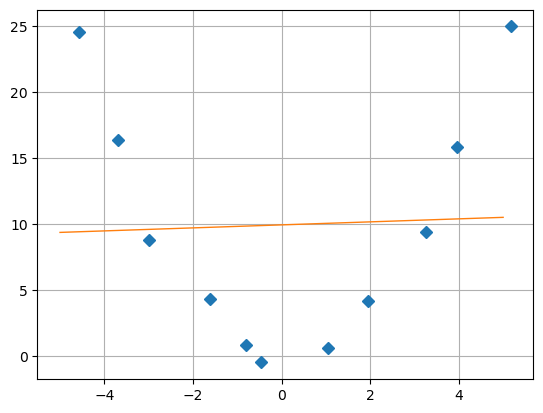

In [13]:
# 1 порядок
m = vstack((x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-5, 5, 101)
plt.plot(x, y, "D")
plt.plot(x_prec, s[0] * x_prec + s[1], "-", lw = 1)
plt.grid()
plt.savefig("1-й степень.png")

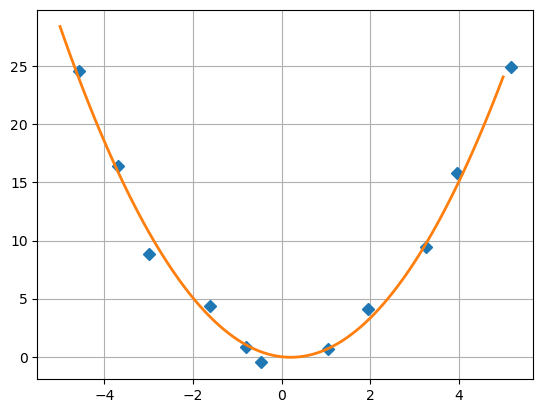

In [14]:
# 2 порядок
m = vstack((x ** 2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-5, 5, 101)
plt.plot(x, y, "D")
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], "-", lw = 2)
plt.grid()
plt.savefig("2-й степень.png")

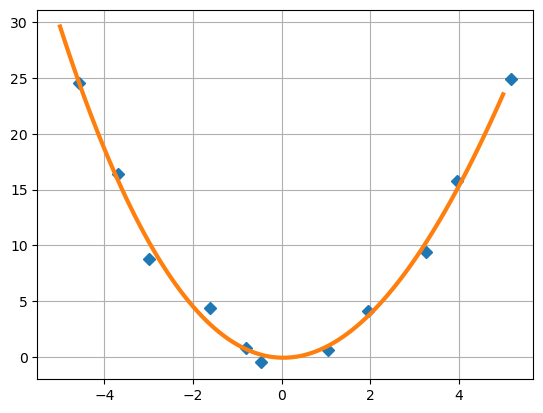

In [15]:
# 3 степень
m = vstack((x ** 3, x ** 2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-5, 5, 101)
plt.plot(x, y, "D")
plt.plot(x_prec, s[0] * x_prec ** 3 + s[1] * x_prec ** 2 + s[2] * x_prec + s[3], "-", lw = 3)
plt.grid()
plt.savefig("3-й степень.png")

## 1.1.4 Пример
Задача:
Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривую вида 𝑓𝑓(𝑥𝑥, 𝑏𝑏) = 𝑏𝑏0 + 𝑏𝑏1 * exp * (−𝑏𝑏2𝑥𝑥2)

In [16]:
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x ** 2)

xdata = np.linspace(0, 5, 50)

y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))

In [17]:
from scipy.optimize import curve_fit
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
beta_opt

array([0.2487218 , 0.72956392, 0.44271736])

In [18]:
lin_dev = sum(beta_cov[0])
print(lin_dev)

0.0002117620903551107


In [19]:
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

0.11044490463516199


<function matplotlib.pyplot.show(close=None, block=None)>

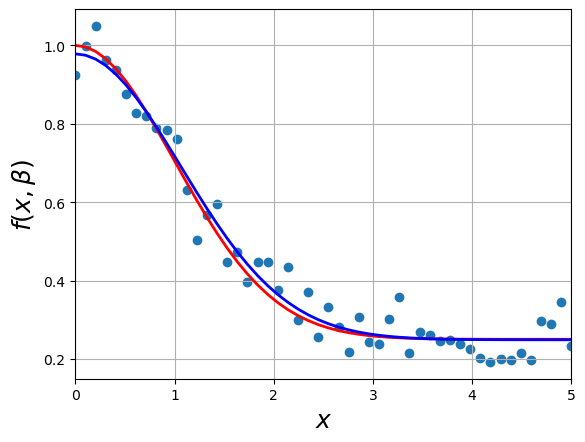

In [20]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, "r", lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), "b", lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize = 18)
plt.grid()
plt.show

## 1.1.5 Пример => Задание
Задача:
Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривые вида:
1) 𝑓𝑓(𝑥𝑥, 𝑏𝑏) = 𝑏𝑏0 + 𝑏𝑏1𝑥𝑥
2) 𝑓𝑓(𝑥𝑥, 𝑏𝑏) = 𝑏𝑏0 + 𝑏𝑏1𝑥𝑥 + 𝑏𝑏2𝑥𝑥2
3) 𝑓𝑓(𝑥𝑥, 𝑏𝑏) = 𝑏𝑏0 + 𝑏𝑏1𝑙𝑙𝑙𝑙(𝑥𝑥)
4) 𝑓𝑓(𝑥𝑥, 𝑏𝑏) = 𝑏𝑏0 𝑥𝑥𝑏𝑏1

[ 0.82151441 -0.14971398]
0.0010655385289033974
0.9369390542109423


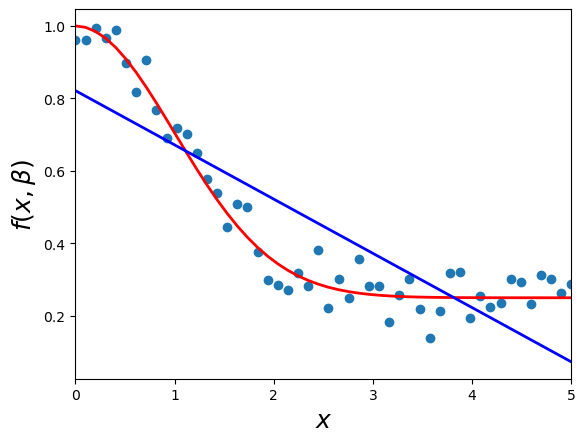

In [38]:
import numpy as np
import scipy as sp

#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами в - (0.25, 0.75)
beta = (0.5, 1)
def f(x, b0, b1):
    return b0 + b1 * x
# зададим массив точек хі
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек ут (без шума)
у = f(xdata, *beta) 
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#вычислим квадратичное отклонение 
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[0.76373077 0.20763372 0.50187096]
0.00012145506423371399
0.10128081562046308


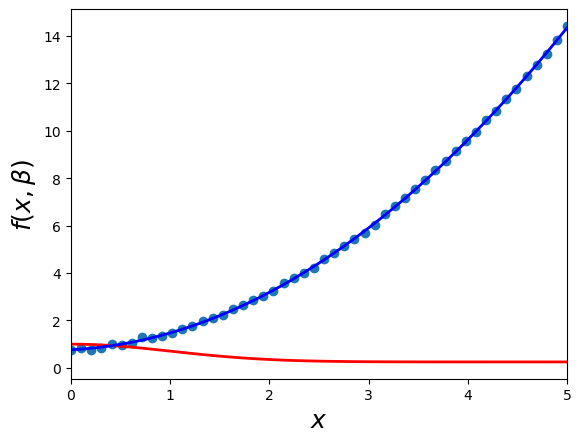

In [39]:
#2
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b (0.25, 0.75, 0.5) 
beta = (0.75, 0.225, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x*x
# зададим массив точек хі
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения почек уі (без шума)
у = f(xdata, *beta)
# замумляем эти данные
ydata = у + 0.05* np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#вычислим квадратичное отклонение 
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[10.01735579  1.98826393]
3.9313499382888416e-05
0.09091016442353432


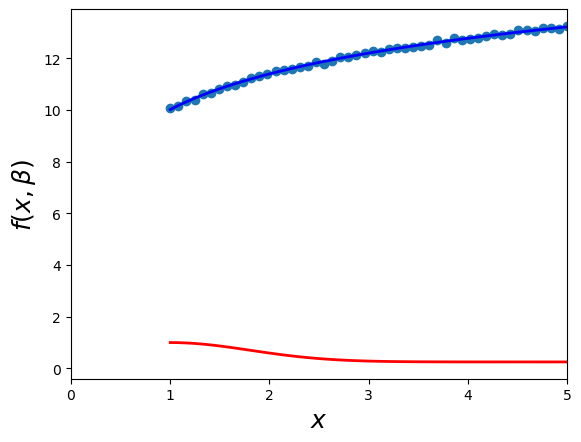

In [41]:
#3
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b (1, 2) 
beta = (10, 2)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
# зададим массив точек хі
xdata = np.linspace(1, 5, 50)
# создаем теоретически правильные значения почек уі (без шума)
у = f(xdata, *beta)
# замумляем эти данные
ydata = у + 0.05* np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#вычислим квадратичное отклонение 
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[6.0000018  7.99999981]
2.562000236138754e-12
0.12251075693640989


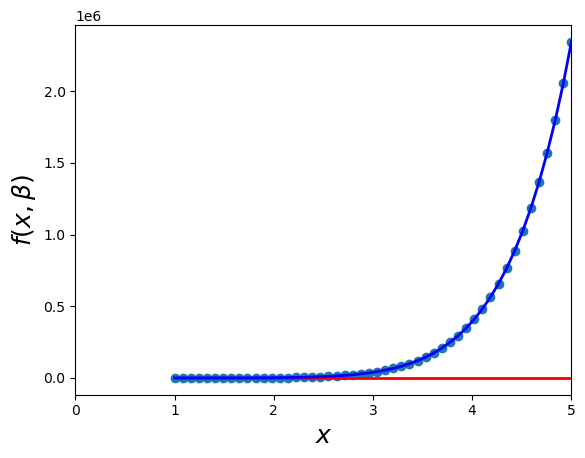

In [40]:
#4
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b (1, 2) 
beta = (6, 8)
def f(x, b0, b1):
    return b0 * x ** b1
# зададим массив точек хі
xdata = np.linspace(1, 5, 50)
# создаем теоретически правильные значения почек уі (без шума)
у = f(xdata, *beta)
# замумляем эти данные
ydata = у + 0.05* np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#вычислим квадратичное отклонение 
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

## 1.2. Теоретический материал – Задачи регрессии
Линейная регрессия - это широко используемый метод статистического
анализа, который использует регрессионный анализ в математической
статистике для определения количественной взаимосвязи между двумя или
более переменными. Если регрессионный анализ включает две или более
независимых переменных, а связь между зависимой и независимой
переменными является линейной, тогда имееи дело с множественной линейной
регрессией.
В этом разделе мы увидим, как библиотеку Scikit-Learn в Python для машинного
обучения можно использовать для реализации функций регрессии. Мы начнем
с простой линейной регрессии с участием двух переменных, а затем перейдем к
линейной регрессии с участием нескольких переменных.

## 1.2.1 Пример
Задача:
Построим простую линейную регрессию в Python с использованием
библиотеки scikit-learn

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [45]:
my_dict = {"Учебное время": [0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25, 3.50, 4.00, 4.25,4.50,4.75, 5.00,5.50],
'Оцeнка': [18,22,13,43,20,22,33,50,62,48,55,75,62,73,81,76,64,82,98,93]}

ds = pd.DataFrame(my_dict)
ds.head()

,Учебное время,Оцeнка
0,0.50,18
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


In [47]:
print(ds.shape)
ds.describe()

(20, 2)


,Учебное время,Оцeнка
count,20.000000,20.000000
mean,2.787500,54.500000
std,1.507165,26.432635
min,0.500000,13.000000
25%,1.687500,30.250000
50%,2.625000,58.500000
75%,4.062500,75.250000
max,5.500000,98.000000


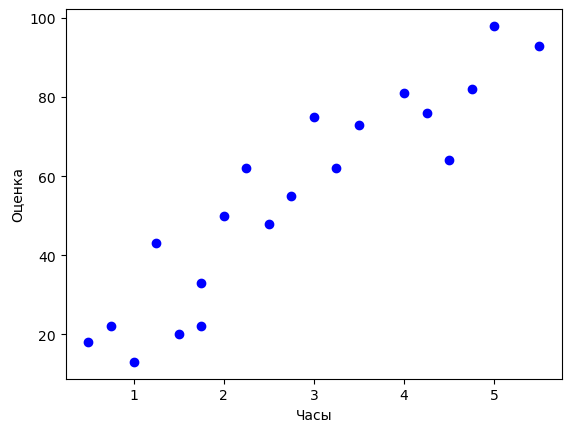

In [50]:
plt.scatter(ds["Учебное время"], ds["Оцeнка"], color = "b", label = "данные экзамена")
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

После того как мы получили представление о данных, разделим информацию
на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки
– это зависимые переменные, значения которых должны быть предсказаны. В
нашем наборе всего два столбца и необходимо предсказать оценку в
зависимости от количества часов. Чтобы извлечь атрибуты и метки,
выполните следующий скрипт:

In [52]:
X = ds.iloc[:, :-1].values
y = ds.iloc[:, 1].values
print(x)
print(y)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[18 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 98 93]


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [54]:
reg = LinearRegression()
reg.fit(X_train, y_train)
print(reg.intercept_)
print(reg.coef_)

7.706594885598932
[16.37146703]


Получившийся результат можно интерпретировать следующим образом: с
каждым затраченным часом на обучение результат экзамена повышается
приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы
будем использовать наши тестовые данные и посмотрим, насколько точно наш
алгоритм предсказывает процентную оценку. Чтобы сделать прогноз на
тестовых данных необходимо выполнить следующий код:

In [55]:
y_pred = reg.predict(X_test)
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
df

,Actual,Predicted
0,98,89.563930
1,22,19.985195
2,93,97.749664
3,62,44.542396


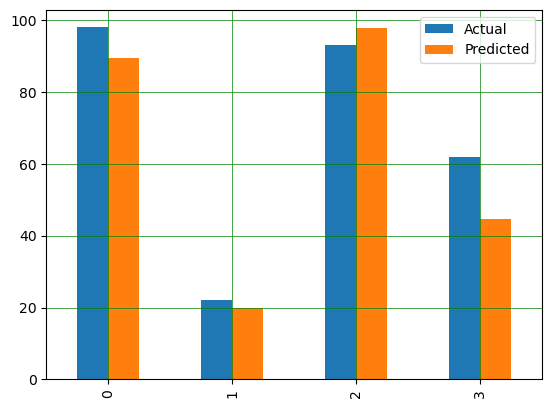

In [56]:
df.plot(kind="bar")
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="black")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

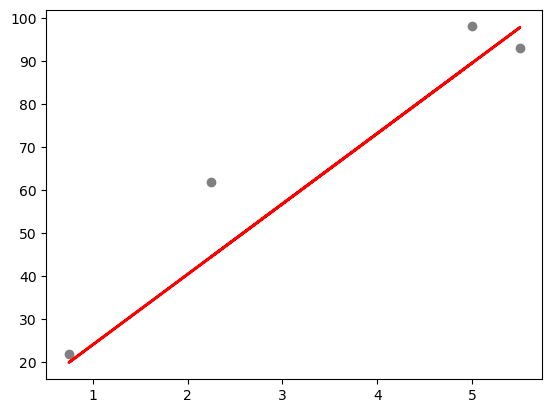

In [58]:
plt.scatter(X_test, y_test, color="gray")
plt.plot(X_test, y_pred, color="red", linewidth = 2)
plt.show

## Задание:
Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз

Коэффициент наклона (slope): 9423.815323030976
Коэффициент сдвига (intercept): 25321.583011776813


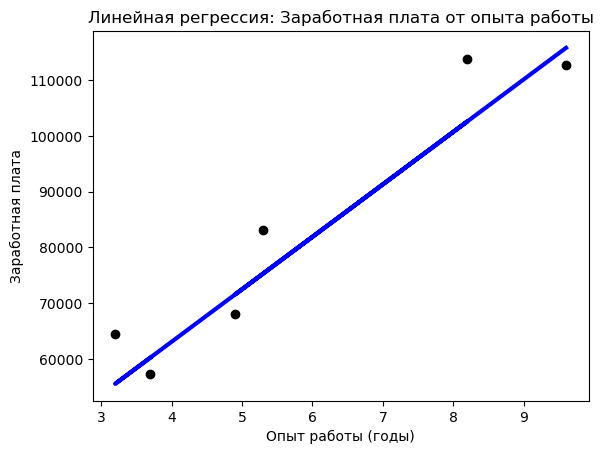

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Загрузка данных
url = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
data = pd.read_csv(url)

# Разделение данных на признаки (опыт работы) и целевую переменную (заработная плата)
X = data['YearsExperience'].values.reshape(-1, 1)
y = data['Salary'].values

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Вывод коэффициентов линии регрессии
print(f'Коэффициент наклона (slope): {model.coef_[0]}')
print(f'Коэффициент сдвига (intercept): {model.intercept_}')

# Построение прогноза на тестовом наборе данных
y_pred = model.predict(X_test)

# Визуализация результата
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.title('Линейная регрессия: Заработная плата от опыта работы')
plt.xlabel('Опыт работы (годы)')
plt.ylabel('Заработная плата')
plt.show()

## 1.3. Теоретический материал – Множественная регрессия
В предыдущем примере мы проиллюстрировали линейную регрессию
с двумя переменными. Однако, почти все реальные задачи имеют больше
параметров. Линейная регрессия с участием нескольких переменных
называется «множественной линейной регрессией» или многомерной
линейной регрессией. Шаги для выполнения множественной линейной
регрессии аналогичны шагам для простой . Разница заключается в оценке.
Вы можете использовать множественную регрессию, чтобы узнать, какой
фактор оказывает наибольшее влияние на прогнозируемый результат или
как различные переменные связаны друг с другом.

## 1.3.1 Пример
Задача:
Для решения задачи множественной регрессии можно задействовать уже
известный метод numpy.linalg.lstsq.

In [3]:
import numpy as np
y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5], [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6], [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]
X = np.transpose (X) # transpose so input vectors
X = np.c_[X, np.ones(X.shape[0])] # add bias term
linreg= np.linalg.lstsq(X, y, rcond=None)[0]
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


Кроме этого можно использовать возможности библиотеки sсikit-learn.
Рассмотрим пример.

## 1.3.2 Пример
Задача:
Для данных из предыдущей задачи построить модель множественной
линейной регрессии с использованием средств библиотеки sсikit-learn.

In [7]:
#Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
y = [1,2,3,4,3,4,5,3,5,5,4,4,5,6,8,6,3,1,3,1]
X= [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5], [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6], [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]
# формируем DataFrame из двух списков
new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_X = np.array(X)
new_X = new_X.transpose()
df2 = pd.DataFrame(new_X)
df1 = df1.rename (columns = {0: 'y'}, inplace = False)
df2 = df2.rename(columns = {0: 'x1', 1: 'x2', 2: 'x3'}, inplace = False)
                            
frames =[df1, df2]
dataset = pd.concat([df1, df2], axis=1, join="inner")
dataset.head()

,y,x1,x2,x3
0,1,0,4,4
1,2,2,1,1
2,3,4,2,2
3,4,1,3,5
4,3,5,4,6


In [8]:
# изучим данные
print(dataset.shape)
dataset.describe()

(20, 4)


,y,x1,x2,x3
count,20.000000,20.0000,20.000000,20.000000
mean,3.800000,5.3500,5.750000,4.850000
std,1.823819,2.5808,2.381397,2.680829
min,1.000000,0.0000,1.000000,1.000000
25%,3.000000,4.0000,4.000000,2.750000
50%,4.000000,5.0000,6.500000,4.500000
75%,5.000000,7.2500,8.000000,7.000000
max,8.000000,9.0000,9.000000,9.000000


In [10]:
# разделим данные на метки и атрибуты
X = dataset[['x1', 'x2', 'x3']]
y = dataset['y']

In [15]:
# разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)

In [16]:
# для обучения алгоривна мы выполилея пов яз код, что и раньше, используя метод fit() клacca LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [17]:
#выведем коэффициенты модели
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
x1,0.031531
x2,0.333164
x3,0.014122


In [20]:
#Чтобы сделать прогнозы на тестовых данных, выполните следующий код
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
12,5,4.545910
4,3,3.437702
18,3,5.075279
0,1,3.251802


In [21]:
#Последний шаг оценить производительность алгоритма. Мы сделаем это, найдя значения для МБЕ
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 2.4437932661500694


## Задание
Задача:
Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов. Для примера можно взять потребления
газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.

1. https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv

                        Feature  Coefficient
0                    Petrol_tax   -36.993746
1                Average_income    -0.056536
2                Paved_Highways    -0.004382
3  Population_Driver_licence(%)  1346.869298


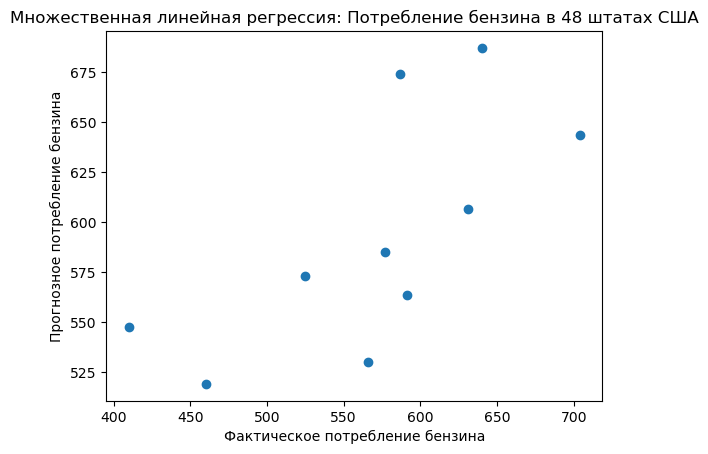

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Загрузка данных
url = "https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv"
data = pd.read_csv(url)

# Выбор признаков (можно выбрать другие столбцы, кроме 'Petrol_Consumption', в зависимости от задачи)
features = data.drop('Petrol_Consumption', axis=1)
target = data['Petrol_Consumption']

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Создание и обучение модели множественной линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Вывод коэффициентов множественной регрессии
coefficients = pd.DataFrame({'Feature': features.columns, 'Coefficient': model.coef_})
print(coefficients)

# Построение прогноза на тестовом наборе данных
y_pred = model.predict(X_test)

# Визуализация результата
plt.scatter(y_test, y_pred)
plt.xlabel('Фактическое потребление бензина')
plt.ylabel('Прогнозное потребление бензина')
plt.title('Множественная линейная регрессия: Потребление бензина в 48 штатах США')
plt.show()

## Задание*
Задача: Экспериментально получены N − значений величины Y при
различных значениях величины X. Построить полиномы первой и второй
степени, аппроксимирующие результаты эксперимента, с применением
метода наименьших квадратов. Результаты выводятся в виде таблиц
значений и графиков, полученных полиномов. Расчеты выполняются ручкой
на бумаге и сравниваются с результатами программы
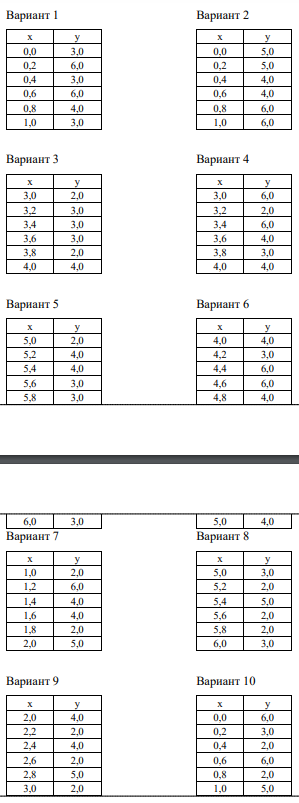

In [24]:
xy = [4, 6, 6, 20, 10, 30]
x = [1, 2, 3, 4, 5, 6]
x2 = [1, 4, 9, 16, 25, 36]
y = [4, 3, 2, 5, 2, 5]
a1 = (6 * (sum(xy)) - (sum(x)) * (sum(y))) / (6 * (sum(x2)) - (sum(x) ** 2))
print(a1)

0.14285714285714285
